In [1]:
import re             # regular expressions
import string         # string operations
import os             # access directories
import pandas as pd   # dataframes
from tqdm import tqdm # create progress bar (for i in tqdm(list))
tqdm.pandas()         # use progress_apply() instead of apply() for progress bar on pandas operations
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

os.chdir('../Data')

In [2]:
df = pd.read_json("UoE_staff_publications_theses_spaczz_matches.json")# unpickled_df

In [3]:
"""
Word clouds
===============

Using a dictionary of word frequency.
"""

import multidict as multidict

import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(keywords):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for term in keywords:
        val = tmpDict.get(term.lower(), 0)
        tmpDict[term.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(frequencydict, maxwords = 250, seed = 12, relative_scale_factor = 'auto'):
    wc = WordCloud(background_color="black",
                   width=800, height=800, 
                   max_words=maxwords, random_state=seed,
                   relative_scaling=relative_scale_factor)
    # generate word cloud
    wc.generate_from_frequencies(frequencydict)

    # show
    plt.figure(figsize=(15,15))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Clean up the data

Manage uninformative keywords such as mean, median, or singular and plural forms of the same method

In [4]:
# df

In [5]:
# pd.set_option('display.max_rows', None)

In [6]:
methods = [item for sublist in [m for m in df['methods'] if not m == None] for item in sublist]

In [8]:
# Singularise
methods_clean = [lemmatizer.lemmatize(method.lower()) for method in methods]
# Standardise
methods_clean = [item.replace("’", "'") for item in methods_clean]
methods_clean = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_clean]
methods_clean = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_clean]
methods_clean = ['ARIMA' if item in ['arima'] else item for item in methods_clean]
methods_clean = ['anonymization' if item in ['anonymity'] else item for item in methods_clean]
methods_clean = ['archival research' if item in ['archival analysis'] else item for item in methods_clean]
methods_clean = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_clean]
methods_clean = ['case study research' if item in ['case study'] else item for item in methods_clean]
methods_clean = ['categorical variables' if item in ['categorical variable'] else item for item in methods_clean]
methods_clean = ['census data' if item in ['census'] else item for item in methods_clean]
methods_clean = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_clean]
methods_clean = ['continuous variables' if item in ['continuous variable'] else item for item in methods_clean]
methods_clean = ['dependent variables' if item in ['dependent variable'] else item for item in methods_clean]
methods_clean = ['independent variables' if item in ['independent variable'] else item for item in methods_clean]
methods_clean = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_clean]
methods_clean = ['standard deviations' if item in ['standard deviation'] else item for item in methods_clean]
methods_clean = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_clean]

methods_clean = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_clean]
methods_clean = ['interviews' if 'interview' in item else item for item in methods_clean]
methods_clean = ['imputation' if 'imputation' in item else item for item in methods_clean]
methods_clean = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_clean]
methods_clean = ['neural networks' if 'neural network' in item else item for item in methods_clean]
methods_clean = ['multilevel analysis' if 'multilevel' in item else item for item in methods_clean]
methods_clean = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_clean]
methods_clean = ['sampling' if 'sampl' in item else item for item in methods_clean]

methods_clean = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_clean]
methods_clean = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_clean]

# methods_clean = ['' if item in [''] else item for item in methods_clean]
# methods_clean = ['' if item in [''] else item for item in methods_clean]
# methods_clean = ['' if item in [''] else item for item in methods_clean]
# methods_clean = ['' if item in [''] else item for item in methods_clean]
# methods_clean = ['' if item in [''] else item for item in methods_clean]

In [9]:
# df2 = pd.DataFrame(methods_clean, columns = ['methods_clean'])

In [10]:
# df2.value_counts()

In [11]:
# df3 = pd.DataFrame((df2.methods_clean.value_counts().sort_index(ascending=True)))
# df3

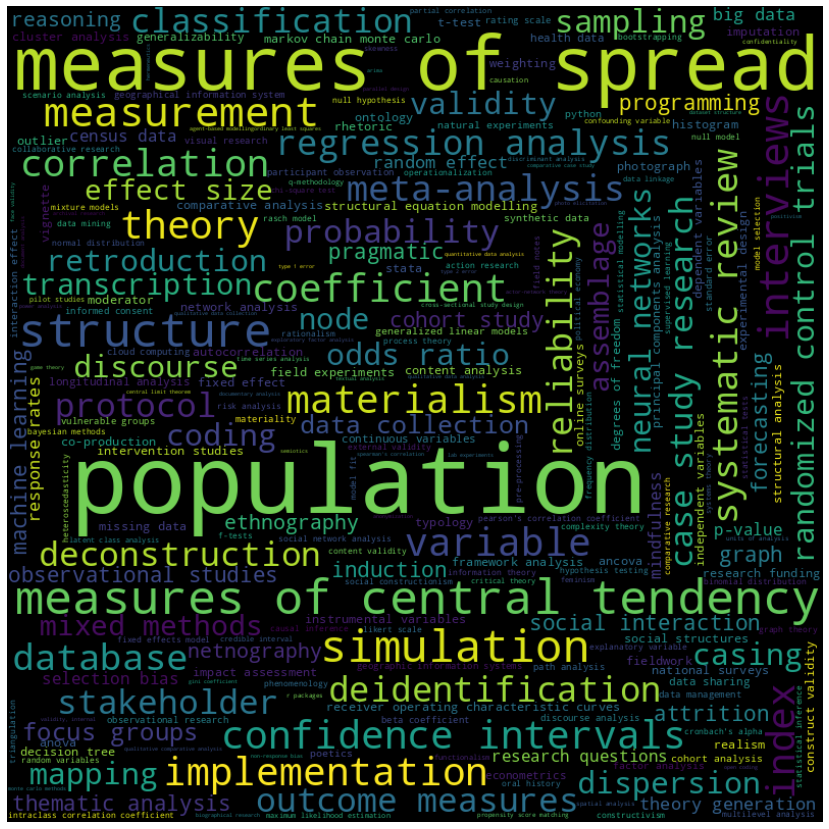

In [12]:
makeImage(getFrequencyDictForText(methods_clean), seed = 1, relative_scale_factor = 0.2)

In [13]:
df.head()

id          college department                   name  \
0   0  Business School  Economics  Professor Ian Bateman   
1   0  Business School  Economics  Professor Ian Bateman   
2   0  Business School  Economics  Professor Ian Bateman   
3   0  Business School  Economics  Professor Ian Bateman   
4   0  Business School  Economics  Professor Ian Bateman   

                                                role  \
0  Professor of Environmental Economics, Director...   
1  Professor of Environmental Economics, Director...   
2  Professor of Environmental Economics, Director...   
3  Professor of Environmental Economics, Director...   
4  Professor of Environmental Economics, Director...   

                                             profile namelast namefirst  \
0  https://business-school.exeter.ac.uk/about/peo...  Bateman       Ian   
1  https://business-school.exeter.ac.uk/about/peo...  Bateman       Ian   
2  https://business-school.exeter.ac.uk/about/peo...  Bateman       Ian   
3  https://business-school.exeter.ac.uk/about/peo...  Bateman       Ian   
4  https://business-school.exeter.ac.uk/about/peo...  Bateman       Ian   

  identifier1   identifier2  ...  \
0  bateman, i  bateman, ian  ...   
1  bateman, i  bateman, ian  ...   
2  bateman, i  bateman, ian  ...   
3  bateman, i  bateman, ian  ...   
4  bateman, i  bateman, ian  ...   

                                           abstracts  \
0  Ricardian (hedonic) analyses of the impact of ...   
1                                               None   
2                                               None   
3  Landscapes generate a wide range of valuable e...   
4  We present an integrated model of the direct c...   

                                                urls     fields    types  \
0  https://ore.exeter.ac.uk/repository/handle/108...  Economics  article   
1  https://ore.exeter.ac.uk/repository/handle/108...  Economics  article   
2  https://ore.exeter.ac.uk/repository/handle/108...  Economics  article   
3  https://ore.exeter.ac.uk/repository/handle/108...  Economics  article   
4  https://ore.exeter.ac.uk/repository/handle/108...  Economics  article   

                                  abstracts_matching  \
0   ricardian  hedonic  analyses of the impact of...   
1                                               None   
2                                               None   
3   landscapes generate a wide range of valuable ...   
4   we present an integrated model of the direct ...   

                                        abstract_nlp  \
0  Ricardian (hedonic) analyses of the impact of ...   
1                                               None   
2                                               None   
3  Landscapes generate a wide range of valuable e...   
4  We present an integrated model of the direct c...   

                              matches               methods  \
0  [[Interaction effect, 69, 71, 97]]  [Interaction effect]   
1                                None                  None   
2                                None                  None   
3                [[Range, 4, 5, 100]]               [Range]   
4                                  []                    []   

          methods_tokens match_ratios  
0  [interaction effects]         [97]  
1                   None         None  
2                   None         None  
3                [range]        [100]  
4                     []           []  

[5 rows x 24 columns]

In [44]:
methods_business = [item for sublist in [m for m in df[df.college == 'Business School']['methods'] if not m == None] 
                 for item in sublist]
# Singularise
methods_business = [lemmatizer.lemmatize(method.lower()) for method in methods_business]
# Standardise
methods_business = [item.replace("’", "'") for item in methods_business]
methods_business = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_business]
methods_business = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_business]
methods_business = ['ARIMA' if item in ['arima'] else item for item in methods_business]
methods_business = ['anonymization' if item in ['anonymity'] else item for item in methods_business]
methods_business = ['archival research' if item in ['archival analysis'] else item for item in methods_business]
methods_business = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_business]
methods_business = ['case study research' if item in ['case study'] else item for item in methods_business]
methods_business = ['categorical variables' if item in ['categorical variable'] else item for item in methods_business]
methods_business = ['census data' if item in ['census'] else item for item in methods_business]
methods_business = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_business]
methods_business = ['continuous variables' if item in ['continuous variable'] else item for item in methods_business]
methods_business = ['dependent variables' if item in ['dependent variable'] else item for item in methods_business]
methods_business = ['independent variables' if item in ['independent variable'] else item for item in methods_business]
methods_business = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_business]
methods_business = ['standard deviations' if item in ['standard deviation'] else item for item in methods_business]
methods_business = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_business]

methods_business = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_business]
methods_business = ['interviews' if 'interview' in item else item for item in methods_business]
methods_business = ['imputation' if 'imputation' in item else item for item in methods_business]
methods_business = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_business]
methods_business = ['neural networks' if 'neural network' in item else item for item in methods_business]
methods_business = ['multilevel analysis' if 'multilevel' in item else item for item in methods_business]
methods_business = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_business]
methods_business = ['sampling' if 'sampl' in item else item for item in methods_business]

# methods_business = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_business]
# methods_business = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_business]

In [45]:
methods_CEMPS = [item for sublist in [m for m in df[df.college == 'College of Engineering, Mathematics and Physical Sciences']['methods'] if not m == None] 
                 for item in sublist]
# Singularise
methods_CEMPS = [lemmatizer.lemmatize(method.lower()) for method in methods_CEMPS]
# Standardise
methods_CEMPS = [item.replace("’", "'") for item in methods_CEMPS]
methods_CEMPS = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_CEMPS]
methods_CEMPS = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_CEMPS]
methods_CEMPS = ['ARIMA' if item in ['arima'] else item for item in methods_CEMPS]
methods_CEMPS = ['anonymization' if item in ['anonymity'] else item for item in methods_CEMPS]
methods_CEMPS = ['archival research' if item in ['archival analysis'] else item for item in methods_CEMPS]
methods_CEMPS = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_CEMPS]
methods_CEMPS = ['case study research' if item in ['case study'] else item for item in methods_CEMPS]
methods_CEMPS = ['categorical variables' if item in ['categorical variable'] else item for item in methods_CEMPS]
methods_CEMPS = ['census data' if item in ['census'] else item for item in methods_CEMPS]
methods_CEMPS = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_CEMPS]
methods_CEMPS = ['continuous variables' if item in ['continuous variable'] else item for item in methods_CEMPS]
methods_CEMPS = ['dependent variables' if item in ['dependent variable'] else item for item in methods_CEMPS]
methods_CEMPS = ['independent variables' if item in ['independent variable'] else item for item in methods_CEMPS]
methods_CEMPS = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_CEMPS]
methods_CEMPS = ['standard deviations' if item in ['standard deviation'] else item for item in methods_CEMPS]
methods_CEMPS = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_CEMPS]

methods_CEMPS = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_CEMPS]
methods_CEMPS = ['interviews' if 'interview' in item else item for item in methods_CEMPS]
methods_CEMPS = ['imputation' if 'imputation' in item else item for item in methods_CEMPS]
methods_CEMPS = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_CEMPS]
methods_CEMPS = ['neural networks' if 'neural network' in item else item for item in methods_CEMPS]
methods_CEMPS = ['multilevel analysis' if 'multilevel' in item else item for item in methods_CEMPS]
methods_CEMPS = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_CEMPS]
methods_CEMPS = ['sampling' if 'sampl' in item else item for item in methods_CEMPS]

# methods_CEMPS = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_CEMPS]
# methods_CEMPS = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_CEMPS]

In [46]:
methods_humanities = [item for sublist in [m for m in df[df.college == 'College of Humanities']['methods'] if not m == None] for item in sublist]
# Singularise
methods_humanities = [lemmatizer.lemmatize(method.lower()) for method in methods_humanities]
# Standardise
methods_humanities = [item.replace("’", "'") for item in methods_humanities]
methods_humanities = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_humanities]
methods_humanities = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_humanities]
methods_humanities = ['ARIMA' if item in ['arima'] else item for item in methods_humanities]
methods_humanities = ['anonymization' if item in ['anonymity'] else item for item in methods_humanities]
methods_humanities = ['archival research' if item in ['archival analysis'] else item for item in methods_humanities]
methods_humanities = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_humanities]
methods_humanities = ['case study research' if item in ['case study'] else item for item in methods_humanities]
methods_humanities = ['categorical variables' if item in ['categorical variable'] else item for item in methods_humanities]
methods_humanities = ['census data' if item in ['census'] else item for item in methods_humanities]
methods_humanities = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_humanities]
methods_humanities = ['continuous variables' if item in ['continuous variable'] else item for item in methods_humanities]
methods_humanities = ['dependent variables' if item in ['dependent variable'] else item for item in methods_humanities]
methods_humanities = ['independent variables' if item in ['independent variable'] else item for item in methods_humanities]
methods_humanities = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_humanities]
methods_humanities = ['standard deviations' if item in ['standard deviation'] else item for item in methods_humanities]
methods_humanities = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_humanities]

methods_humanities = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_humanities]
methods_humanities = ['interviews' if 'interview' in item else item for item in methods_humanities]
methods_humanities = ['imputation' if 'imputation' in item else item for item in methods_humanities]
methods_humanities = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_humanities]
methods_humanities = ['neural networks' if 'neural network' in item else item for item in methods_humanities]
methods_humanities = ['multilevel analysis' if 'multilevel' in item else item for item in methods_humanities]
methods_humanities = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_humanities]
methods_humanities = ['sampling' if 'sampl' in item else item for item in methods_humanities]

# methods_humanities = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_humanities]
# methods_humanities = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_humanities]

In [47]:
methods_CLES = [item for sublist in [m for m in df[df.college == 'College of Life and Environmental Sciences']['methods'] if not m == None] for item in sublist]
# Singularise
methods_CLES = [lemmatizer.lemmatize(method.lower()) for method in methods_CLES]
# Standardise
methods_CLES = [item.replace("’", "'") for item in methods_CLES]
methods_CLES = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_CLES]
methods_CLES = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_CLES]
methods_CLES = ['ARIMA' if item in ['arima'] else item for item in methods_CLES]
methods_CLES = ['anonymization' if item in ['anonymity'] else item for item in methods_CLES]
methods_CLES = ['archival research' if item in ['archival analysis'] else item for item in methods_CLES]
methods_CLES = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_CLES]
methods_CLES = ['case study research' if item in ['case study'] else item for item in methods_CLES]
methods_CLES = ['categorical variables' if item in ['categorical variable'] else item for item in methods_CLES]
methods_CLES = ['census data' if item in ['census'] else item for item in methods_CLES]
methods_CLES = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_CLES]
methods_CLES = ['continuous variables' if item in ['continuous variable'] else item for item in methods_CLES]
methods_CLES = ['dependent variables' if item in ['dependent variable'] else item for item in methods_CLES]
methods_CLES = ['independent variables' if item in ['independent variable'] else item for item in methods_CLES]
methods_CLES = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_CLES]
methods_CLES = ['standard deviations' if item in ['standard deviation'] else item for item in methods_CLES]
methods_CLES = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_CLES]

methods_CLES = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_CLES]
methods_CLES = ['interviews' if 'interview' in item else item for item in methods_CLES]
methods_CLES = ['imputation' if 'imputation' in item else item for item in methods_CLES]
methods_CLES = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_CLES]
methods_CLES = ['neural networks' if 'neural network' in item else item for item in methods_CLES]
methods_CLES = ['multilevel analysis' if 'multilevel' in item else item for item in methods_CLES]
methods_CLES = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_CLES]
methods_CLES = ['sampling' if 'sampl' in item else item for item in methods_CLES]

# methods_CLES = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_CLES]
# methods_CLES = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_CLES]

In [48]:
methods_medicine = [item for sublist in [m for m in df[df.college == 'College of Medicine and Health']['methods'] if not m == None] for item in sublist]
# Singularise
methods_medicine = [lemmatizer.lemmatize(method.lower()) for method in methods_medicine]
# Standardise
methods_medicine = [item.replace("’", "'") for item in methods_medicine]
methods_medicine = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_medicine]
methods_medicine = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_medicine]
methods_medicine = ['ARIMA' if item in ['arima'] else item for item in methods_medicine]
methods_medicine = ['anonymization' if item in ['anonymity'] else item for item in methods_medicine]
methods_medicine = ['archival research' if item in ['archival analysis'] else item for item in methods_medicine]
methods_medicine = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_medicine]
methods_medicine = ['case study research' if item in ['case study'] else item for item in methods_medicine]
methods_medicine = ['categorical variables' if item in ['categorical variable'] else item for item in methods_medicine]
methods_medicine = ['census data' if item in ['census'] else item for item in methods_medicine]
methods_medicine = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_medicine]
methods_medicine = ['continuous variables' if item in ['continuous variable'] else item for item in methods_medicine]
methods_medicine = ['dependent variables' if item in ['dependent variable'] else item for item in methods_medicine]
methods_medicine = ['independent variables' if item in ['independent variable'] else item for item in methods_medicine]
methods_medicine = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_medicine]
methods_medicine = ['standard deviations' if item in ['standard deviation'] else item for item in methods_medicine]
methods_medicine = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_medicine]

methods_medicine = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_medicine]
methods_medicine = ['interviews' if 'interview' in item else item for item in methods_medicine]
methods_medicine = ['imputation' if 'imputation' in item else item for item in methods_medicine]
methods_medicine = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_medicine]
methods_medicine = ['neural networks' if 'neural network' in item else item for item in methods_medicine]
methods_medicine = ['multilevel analysis' if 'multilevel' in item else item for item in methods_medicine]
methods_medicine = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_medicine]
methods_medicine = ['sampling' if 'sampl' in item else item for item in methods_medicine]

# methods_medicine = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_medicine]
# methods_medicine = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_medicine]

In [49]:
methods_SSIS = [item for sublist in [m for m in df[df.college == 'College of Social Sciences and International Studies']['methods'] if not m == None] for item in sublist]
# Singularise
methods_SSIS = [lemmatizer.lemmatize(method.lower()) for method in methods_SSIS]
# Standardise
methods_SSIS = [item.replace("’", "'") for item in methods_SSIS]
methods_SSIS = ['ANOVA' if item in ['analysis of variance', 'anova'] else item for item in methods_SSIS]
methods_SSIS = ['ANCOVA' if item in ['analysis of covariance', 'ancova'] else item for item in methods_SSIS]
methods_SSIS = ['ARIMA' if item in ['arima'] else item for item in methods_SSIS]
methods_SSIS = ['anonymization' if item in ['anonymity'] else item for item in methods_SSIS]
methods_SSIS = ['archival research' if item in ['archival analysis'] else item for item in methods_SSIS]
methods_SSIS = ['bayesian methods' if item in ['bayesian hierarchical models', 'bayesian network', 'bayesian statistics'] else item for item in methods_SSIS]
methods_SSIS = ['case study research' if item in ['case study'] else item for item in methods_SSIS]
methods_SSIS = ['categorical variables' if item in ['categorical variable'] else item for item in methods_SSIS]
methods_SSIS = ['census data' if item in ['census'] else item for item in methods_SSIS]
methods_SSIS = ['confidence intervals' if item in ['confidence interval'] else item for item in methods_SSIS]
methods_SSIS = ['continuous variables' if item in ['continuous variable'] else item for item in methods_SSIS]
methods_SSIS = ['dependent variables' if item in ['dependent variable'] else item for item in methods_SSIS]
methods_SSIS = ['independent variables' if item in ['independent variable'] else item for item in methods_SSIS]
methods_SSIS = ['randomized control trials' if item in ['randomized clinical trials'] else item for item in methods_SSIS]
methods_SSIS = ['standard deviations' if item in ['standard deviation'] else item for item in methods_SSIS]
methods_SSIS = ['semi-structured interviews' if item in ['semi-structured interview'] else item for item in methods_SSIS]

methods_SSIS = ['generalized linear models' if 'general ' in item or 'generalized' in item else item for item in methods_SSIS]
methods_SSIS = ['interviews' if 'interview' in item else item for item in methods_SSIS]
methods_SSIS = ['imputation' if 'imputation' in item else item for item in methods_SSIS]
methods_SSIS = ['longitudinal analysis' if 'longitudinal' in item else item for item in methods_SSIS]
methods_SSIS = ['neural networks' if 'neural network' in item else item for item in methods_SSIS]
methods_SSIS = ['multilevel analysis' if 'multilevel' in item else item for item in methods_SSIS]
methods_SSIS = ['regression analysis' if 'regression ' in item or ' regression' in item else item for item in methods_SSIS]
methods_SSIS = ['sampling' if 'sampl' in item else item for item in methods_SSIS]

# methods_SSIS = ['measures of central tendency' if item in ['mean', 'median', 'mode'] else item for item in methods_SSIS]
# methods_SSIS = ['measures of spread' if item in ['interquartile range', 'range', 'standard deviation', 'standard deviations', 'variance'] else item for item in methods_SSIS]

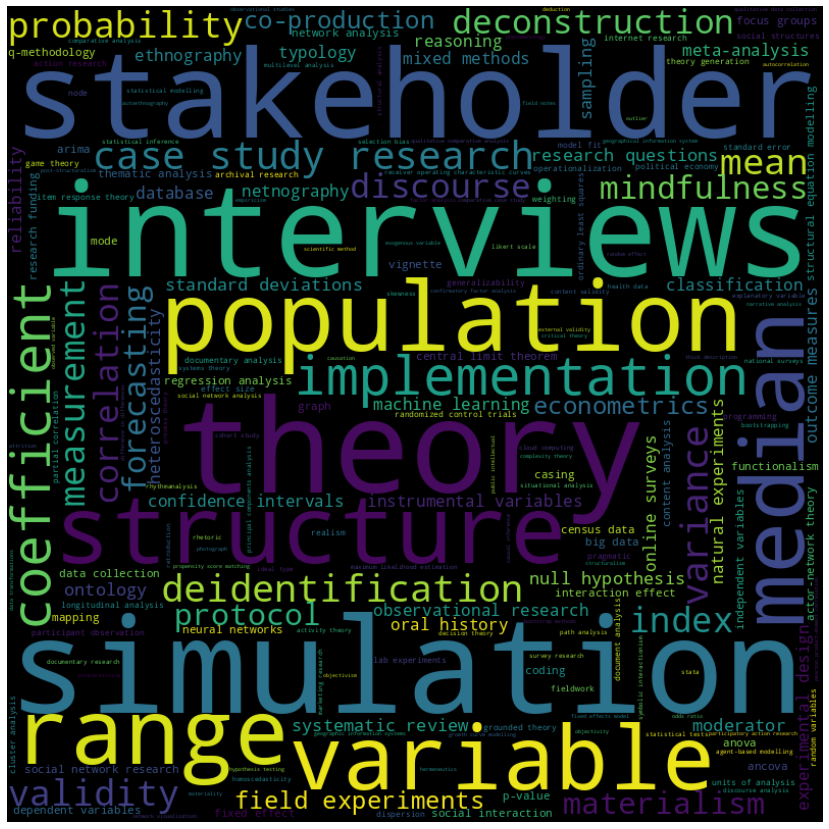

In [64]:
makeImage(getFrequencyDictForText(methods_business), seed = 1, relative_scale_factor = 0.2)

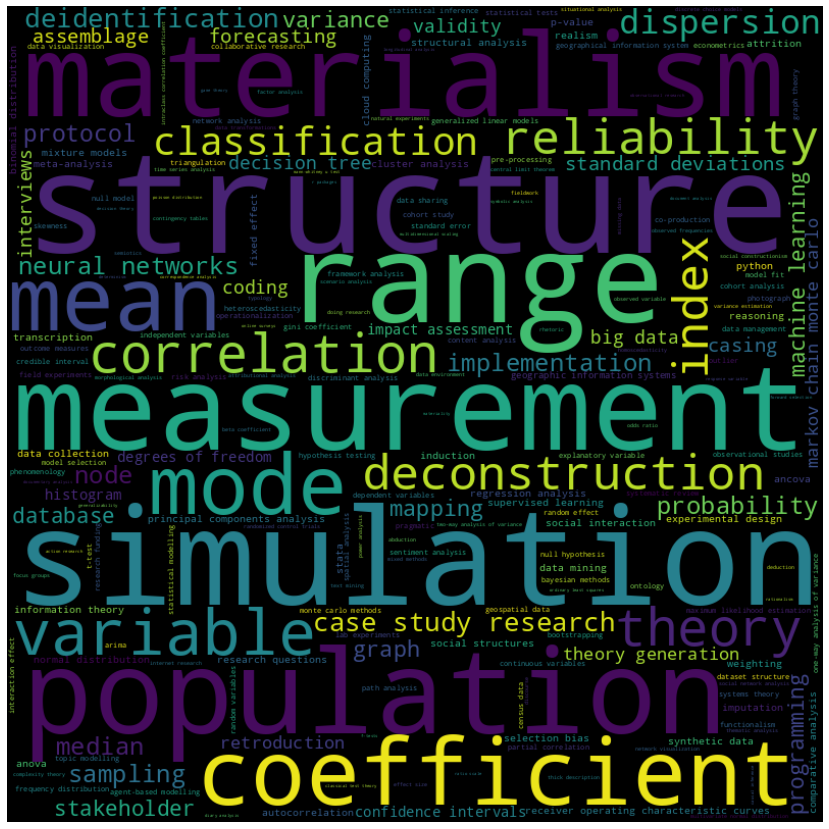

In [63]:
makeImage(getFrequencyDictForText(methods_CEMPS), seed = 1, relative_scale_factor = 0.2)

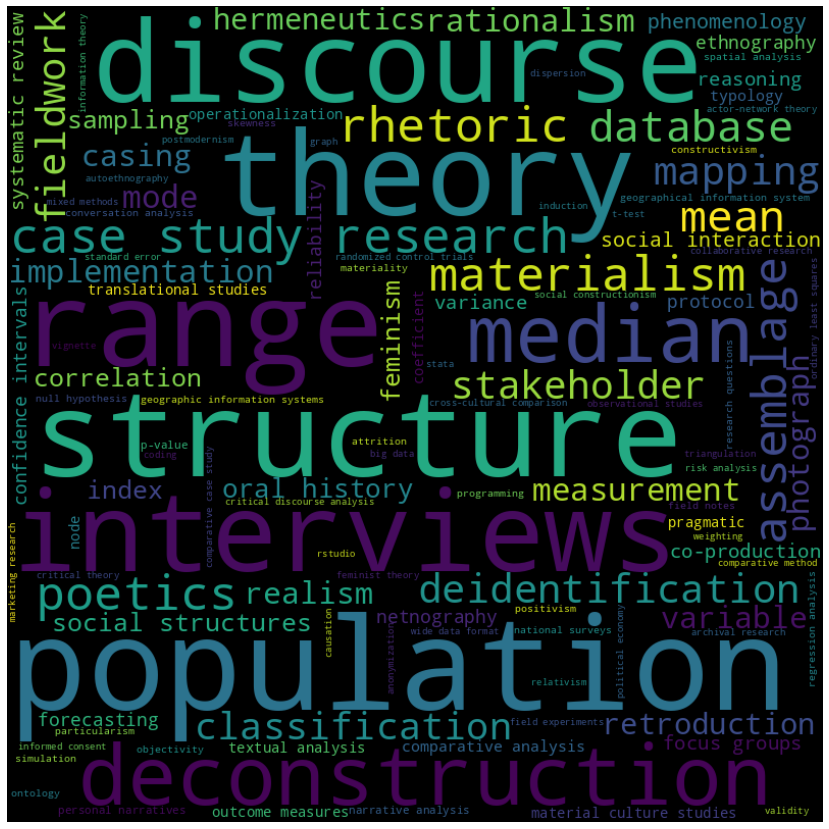

In [62]:
makeImage(getFrequencyDictForText(methods_humanities), seed = 1, relative_scale_factor = 0.2)

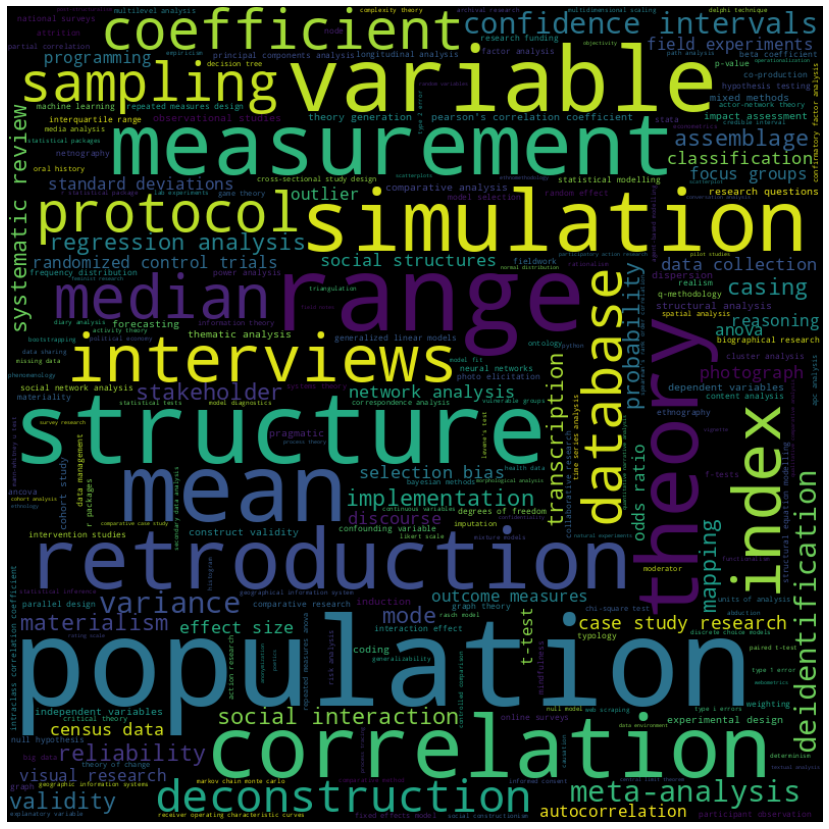

In [61]:
makeImage(getFrequencyDictForText(methods_CLES), seed = 1, relative_scale_factor =  0.2)

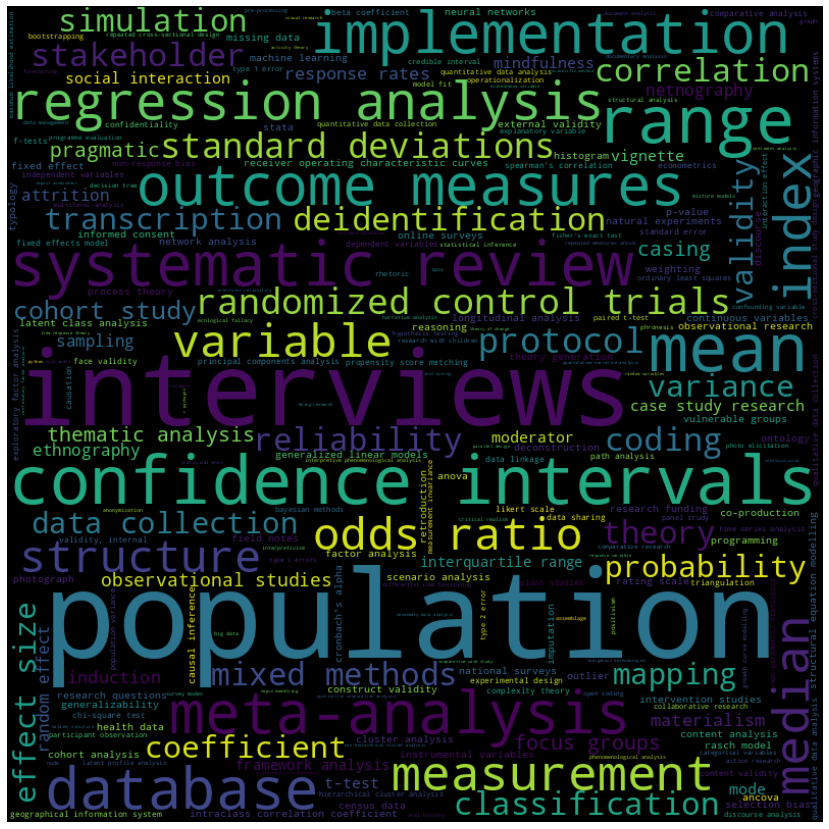

In [54]:
makeImage(getFrequencyDictForText(methods_medicine), seed = 1, relative_scale_factor = 0.2)

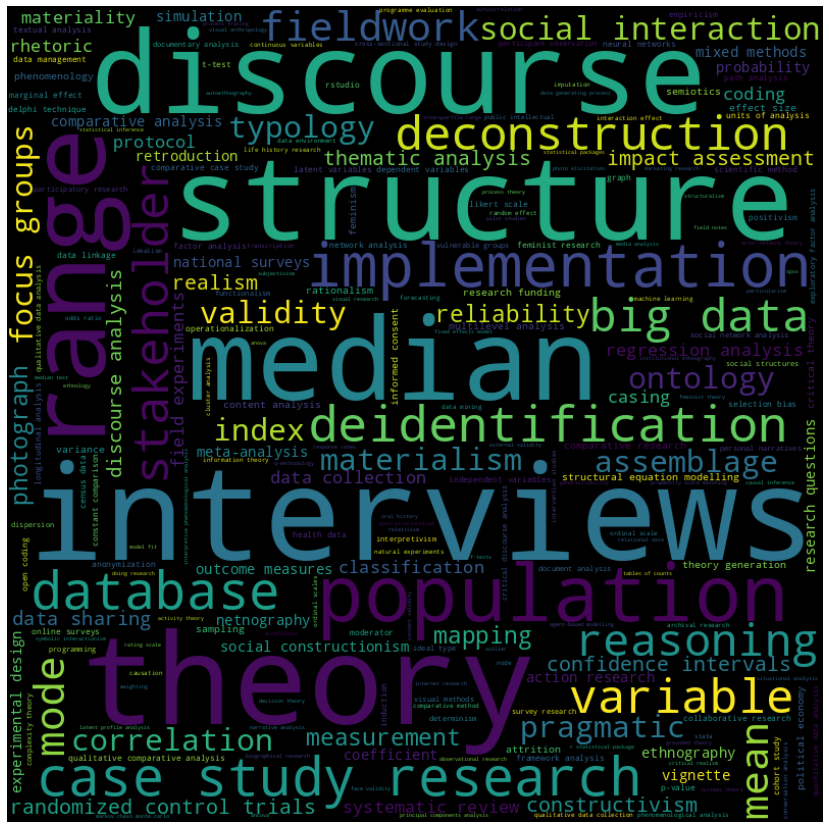

In [55]:
makeImage(getFrequencyDictForText(methods_SSIS), seed = 1, relative_scale_factor = 0.2)